In [1]:
from financeiro import FinancialSignal, AIFinancial, FinancialData
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fi = FinancialData()
indexes = ["IFNC", "BDRX", "IMAT", "IEE", "IMOB"]
data = fi.get_data_by_indexes(indexes)

Número total de ativos: 120
INDEX: IFNC	 ATIVOS: 20
INDEX: BDRX	 ATIVOS: 54
INDEX: IMAT	 ATIVOS: 10
INDEX: IEE	 ATIVOS: 18
INDEX: IMOB	 ATIVOS: 18


In [3]:
train_date = ('2017-10-28', '2019-10-28')
test_date = ('2019-10-28', '2020-10-28')
train, test, volumes = fi.get_data_train_and_test(data, train_date, test_date)

  0%|          | 0/20 [00:00<?, ?it/s]

Get Train Data
FUNDO: IFNC


  0%|          | 0/54 [00:00<?, ?it/s]

FUNDO: BDRX


  0%|          | 0/10 [00:00<?, ?it/s]

FUNDO: IMAT


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IEE


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IMOB


  0%|          | 0/20 [00:00<?, ?it/s]

Get Test Data
FUNDO: IFNC


  0%|          | 0/54 [00:00<?, ?it/s]

FUNDO: BDRX


  0%|          | 0/10 [00:00<?, ?it/s]

FUNDO: IMAT


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IEE


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IMOB


100%|██████████| 18/18 [00:36<00:00,  2.06s/it]


In [4]:
list_v = {}
for df in train.keys():
    a = volumes[df].mean().sort_values(ascending=False)[:10]
    list_v[df] = a.keys()
    
for key in train.keys():
    train[key] = train[key][list_v[key]]

In [5]:
train["IMOB"].describe()

,BRML3.SA,TCSA3.SA,MRVE3.SA,CYRE3.SA,MULT3.SA,GFSA3.SA,IGTA3.SA,JHSF3.SA,EVEN3.SA,TEND3.SA
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,11.510391,1.454496,12.472108,14.108505,22.776262,10.238049,37.859892,2.045556,5.985106,15.370278
std,1.708340,0.324401,2.855383,4.321818,3.058003,3.514890,5.315515,0.920389,2.133382,5.099362
min,8.308002,0.900000,9.198236,8.732777,16.638145,4.770000,28.025795,0.963862,2.886842,7.892261
25%,10.394234,1.270000,10.300169,10.721158,20.929253,6.706050,34.802734,1.459830,4.501515,11.832469
50%,11.492737,1.340000,11.455190,12.679408,22.695371,10.414400,37.578381,1.777997,5.675824,13.714342
75%,12.577978,1.592500,13.386731,15.547363,24.700676,12.175675,41.099011,2.371343,6.282550,17.853353
max,15.350000,2.350000,21.247185,24.685970,29.305798,18.582600,49.713509,4.533364,11.782228,26.568163


In [6]:
dfs = []
for key in train.keys():
    dfs.append(train[key])

result = pd.concat(dfs)

  0%|          | 0/5 [00:00<?, ?it/s]

Segmentacao de dados antes: 
Segmentacao de dados antes: 


 20%|██        | 1/5 [00:01<00:06,  1.71s/it]

Ativos com Melhor Relação em Cada Cluster: ['IRBR3.SA', 'B3SA3.SA']
['IRBR3.SA', 'B3SA3.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 40%|████      | 2/5 [00:03<00:05,  1.73s/it]

Ativos com Melhor Relação em Cada Cluster: ['WALM34.SA', 'AAPL34.SA']
['WALM34.SA', 'AAPL34.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 60%|██████    | 3/5 [00:05<00:03,  1.73s/it]

Ativos com Melhor Relação em Cada Cluster: ['VALE3.SA']
['VALE3.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 80%|████████  | 4/5 [00:07<00:01,  1.83s/it]

Ativos com Melhor Relação em Cada Cluster: ['TRPL4.SA', 'CMIG4.SA', 'TAEE11.SA', 'CESP6.SA', 'EGIE3.SA']
['TRPL4.SA', 'CMIG4.SA', 'TAEE11.SA', 'CESP6.SA', 'EGIE3.SA']
Segmentacao de dados antes: 


/home/victorhdcoelho/Documentos/UNB/SinaisFinanceiros/PersonalProjects/atividade1-SinaisDigitais/financeiro.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Segmentacao de dados antes: 


100%|██████████| 5/5 [00:08<00:00,  1.71s/it]

Ativos com Melhor Relação em Cada Cluster: ['TEND3.SA']
['TEND3.SA']


[('IFNC', ('IRBR3.SA', -0.12227272102757683)),
 ('BDRX', ('AAPL34.SA', -0.17827402652505206)),
 ('IMAT', ('VALE3.SA', -0.16281650622281627)),
 ('IEE', ('CMIG4.SA', -0.14392333491984158)),
 ('IMOB', ('TEND3.SA', -0.13489344080321852))]

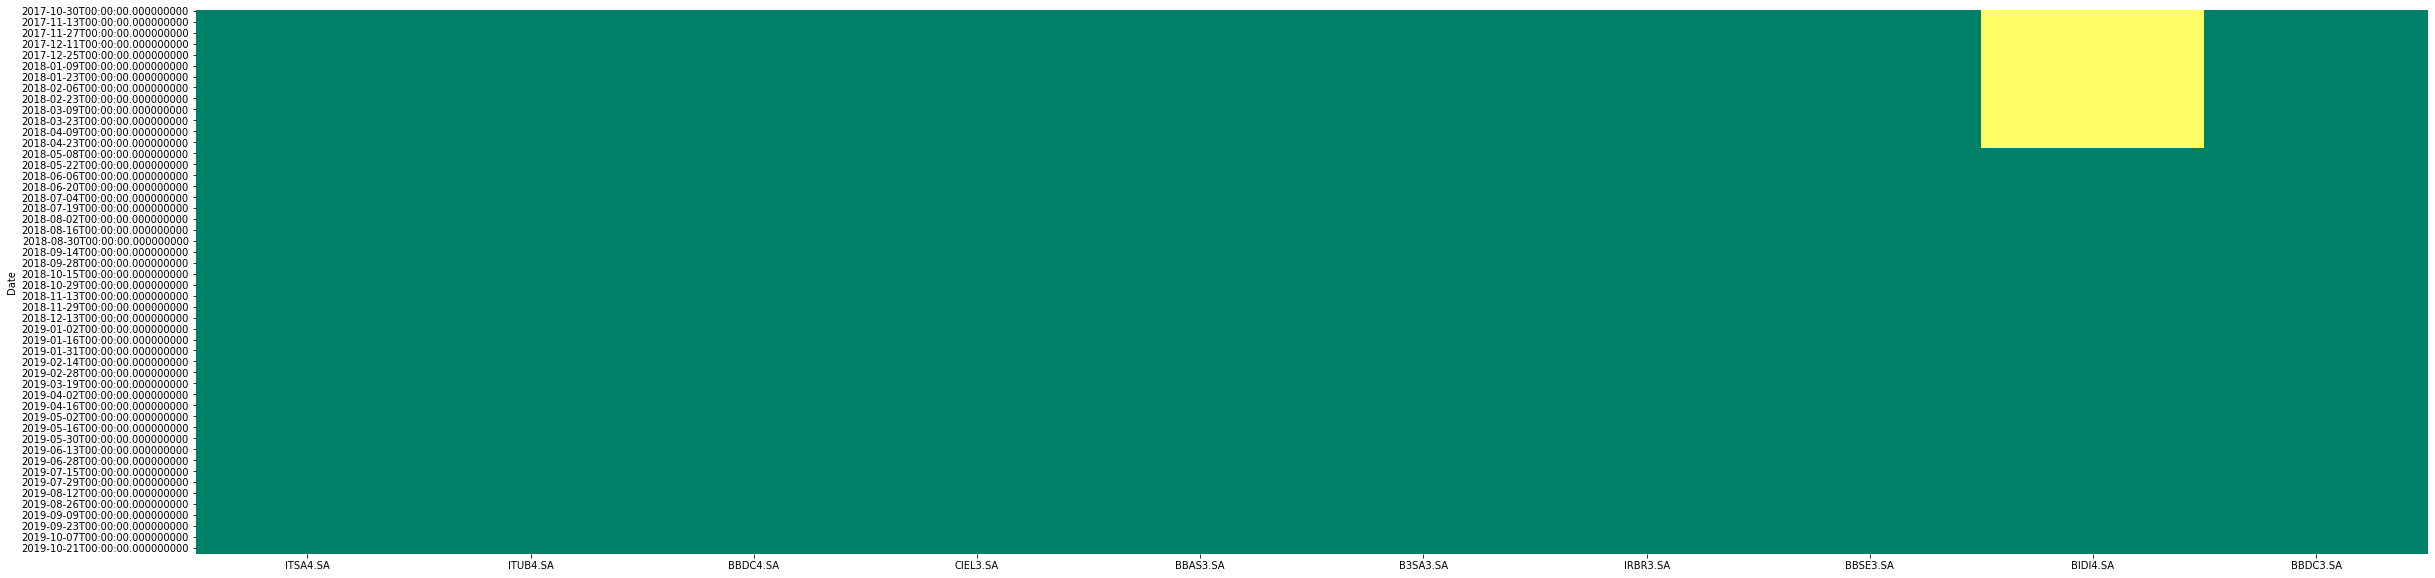

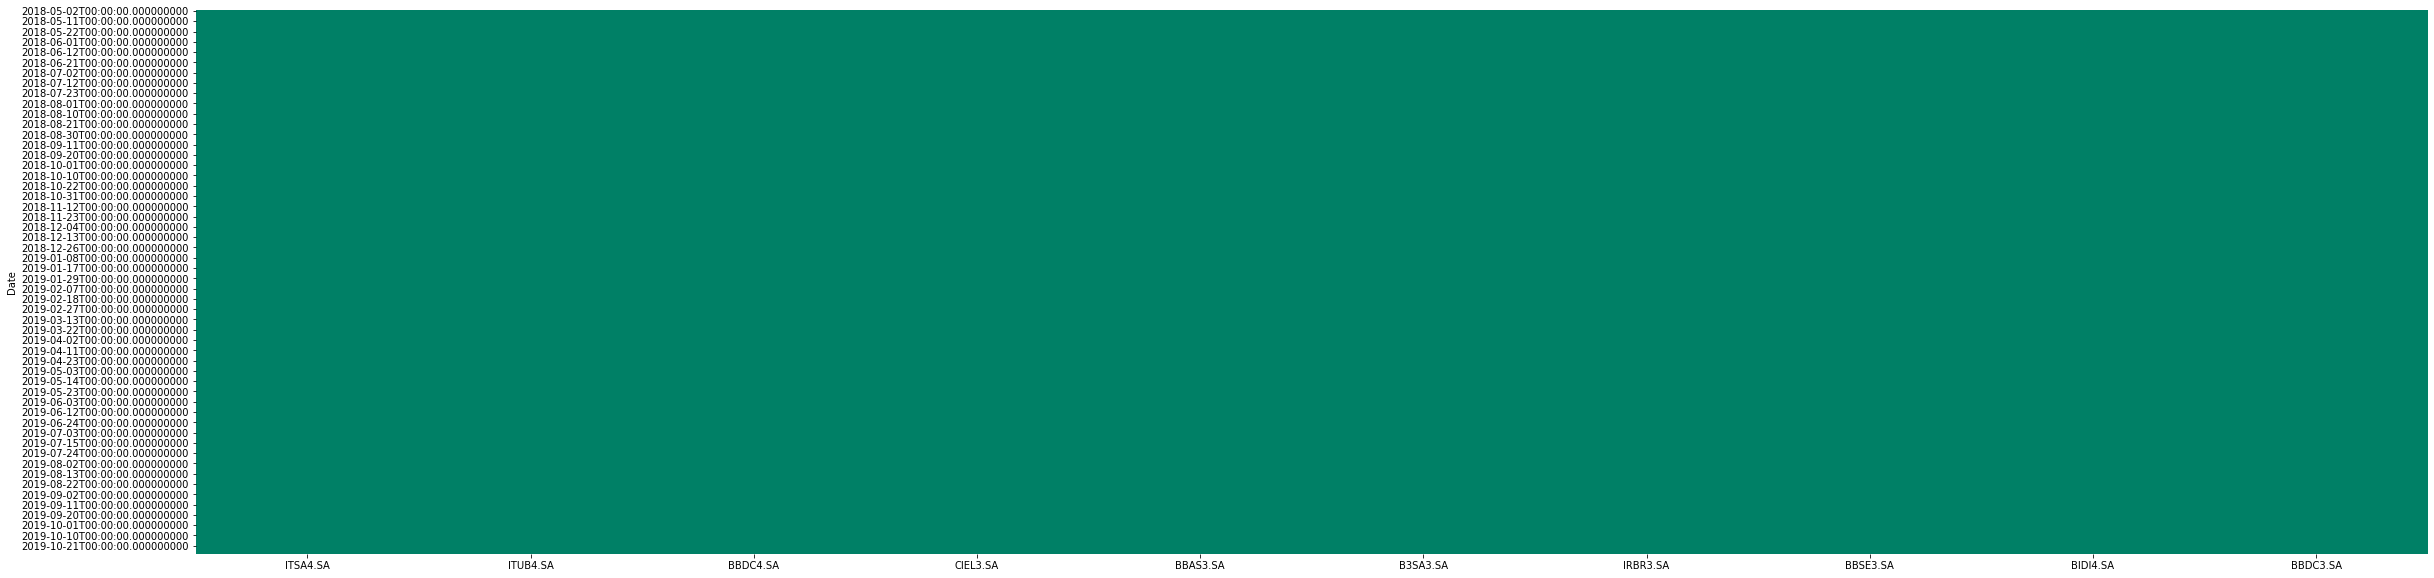

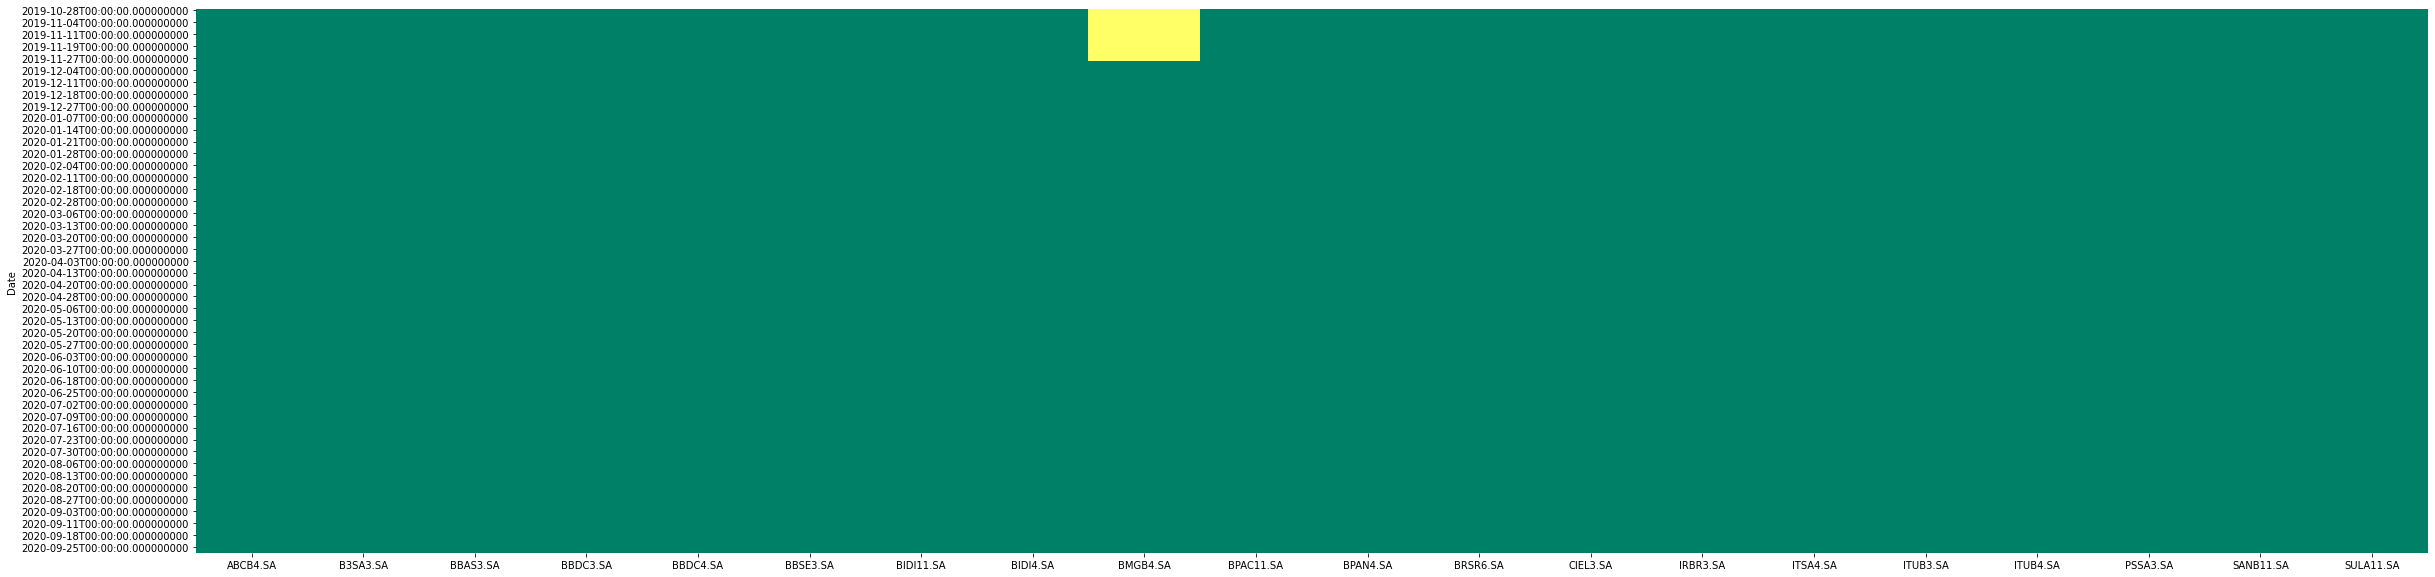

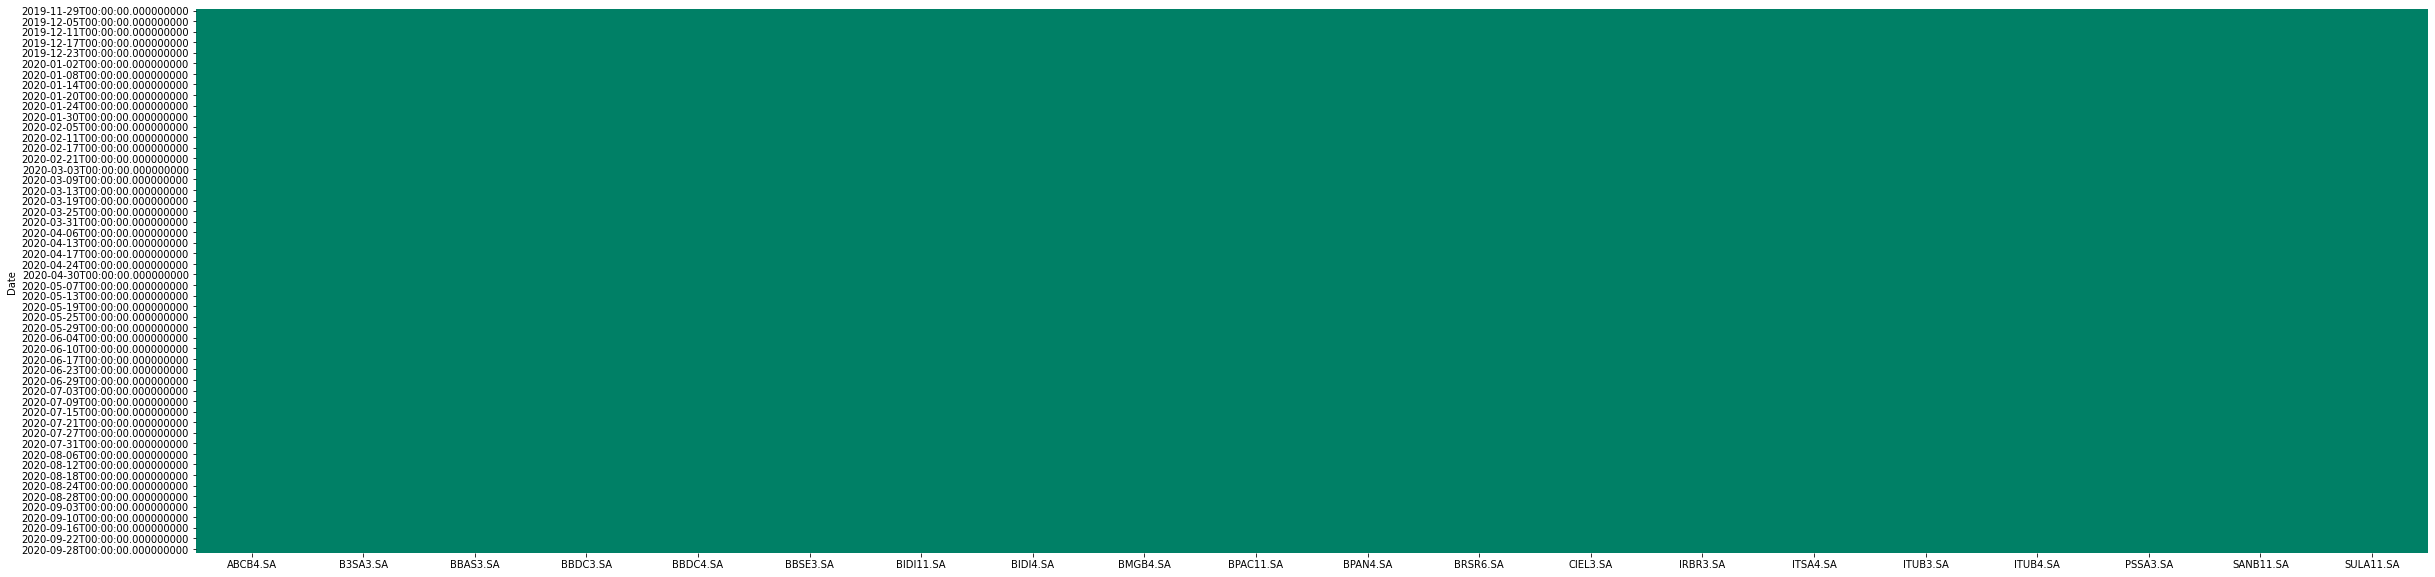

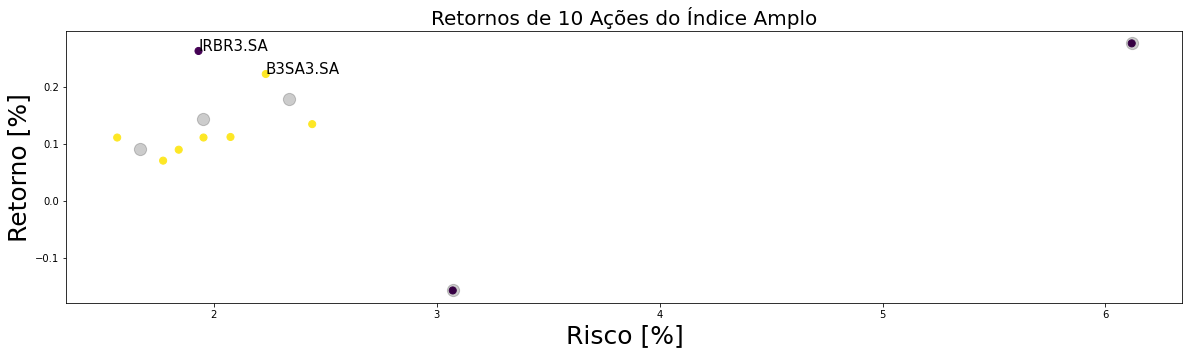

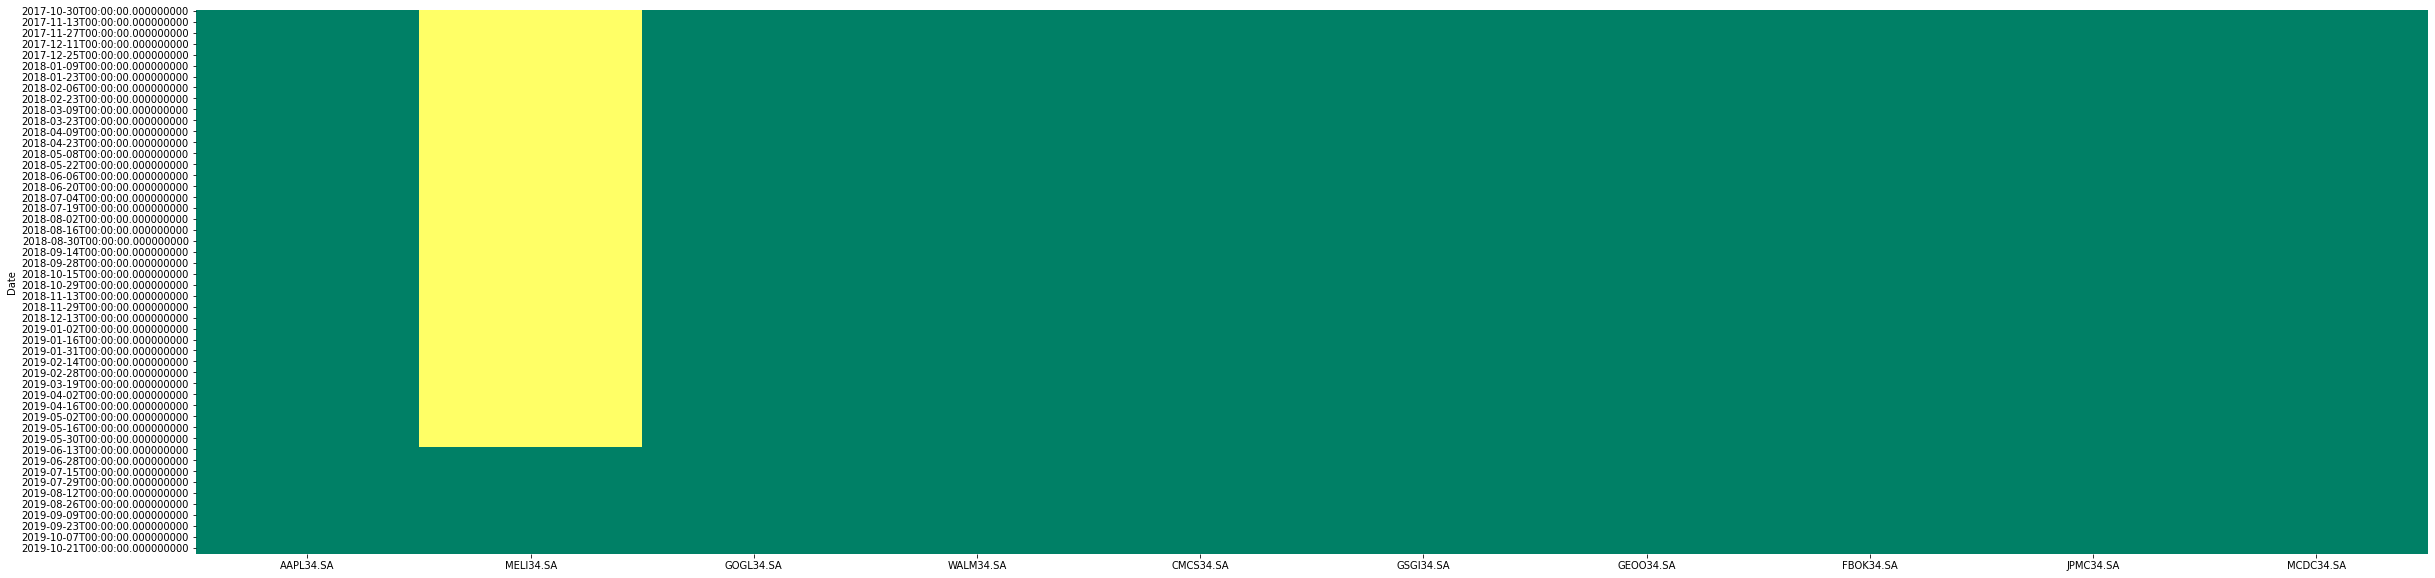

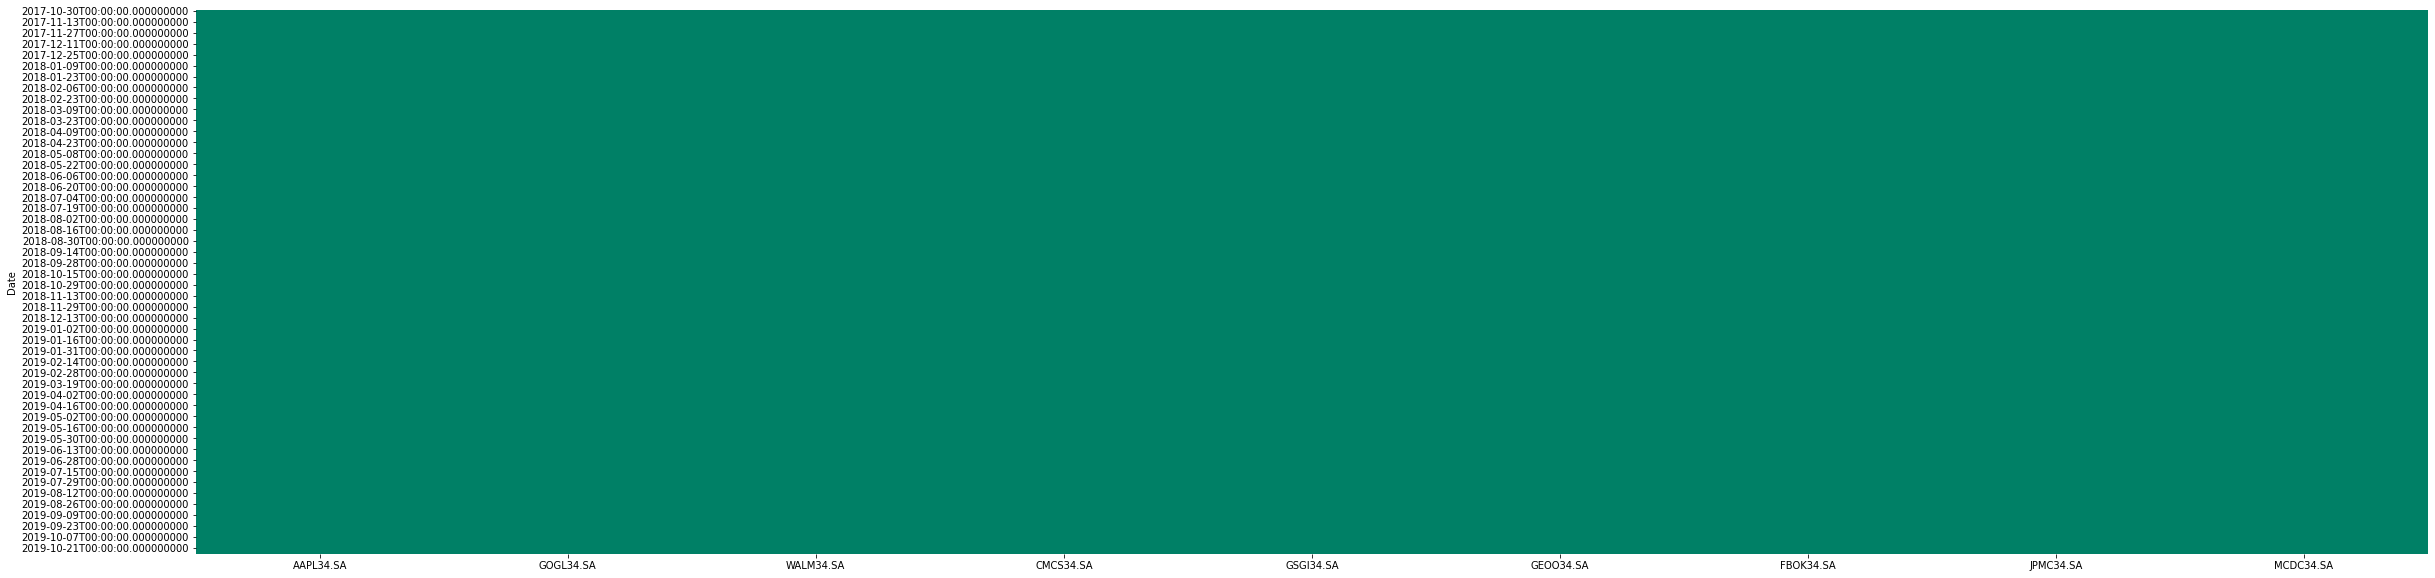

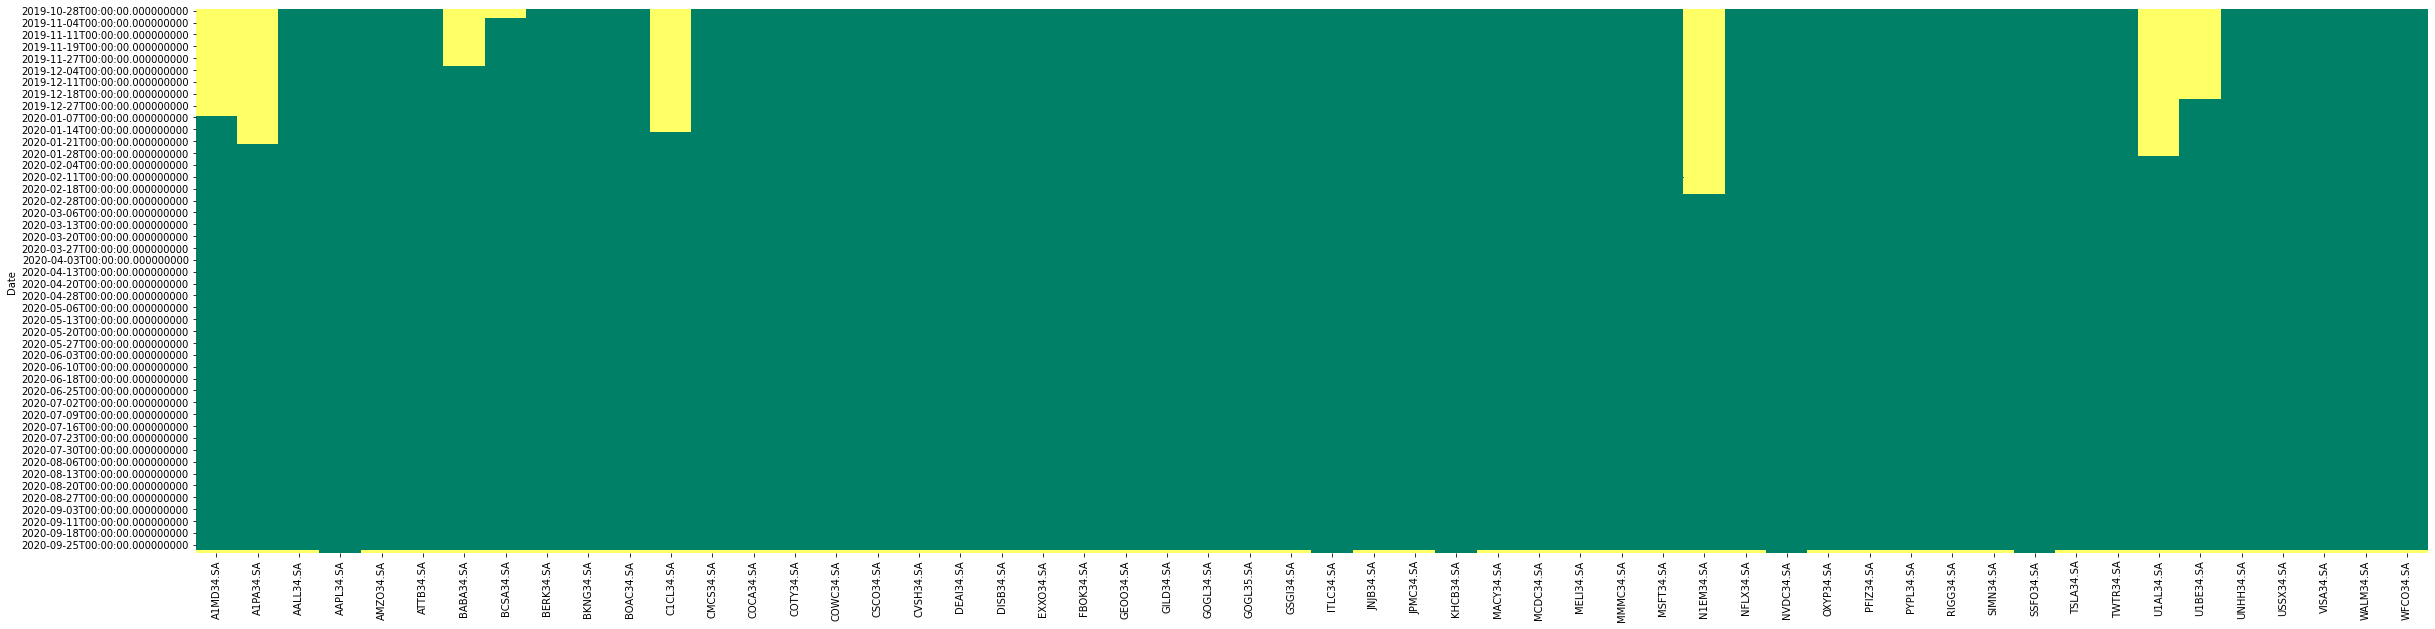

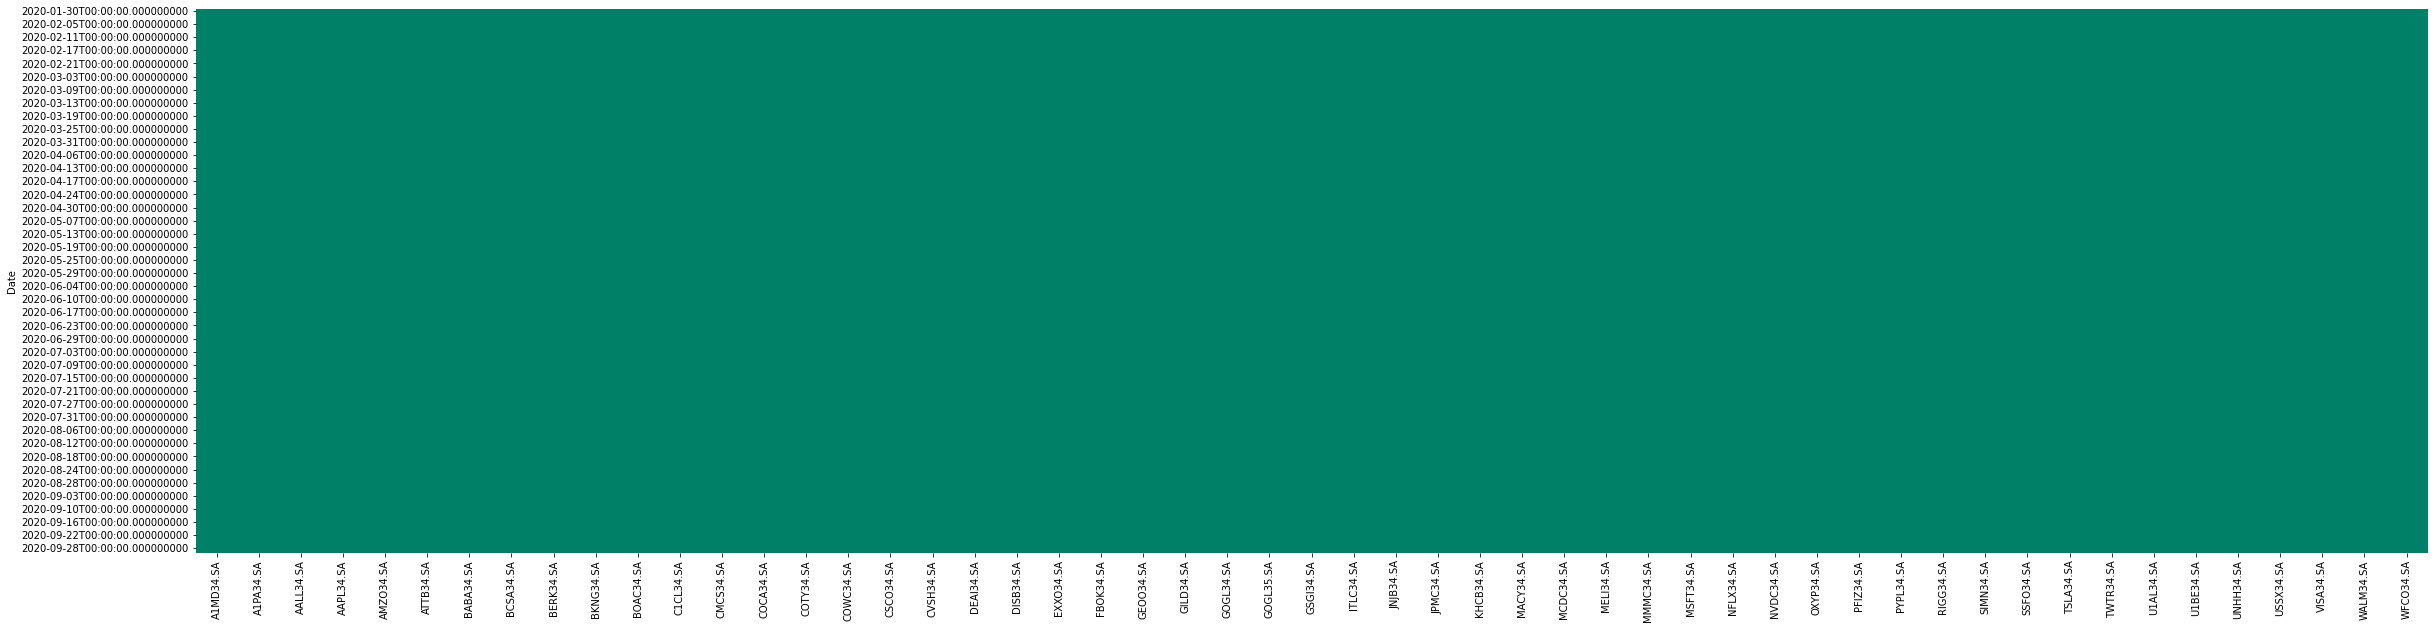

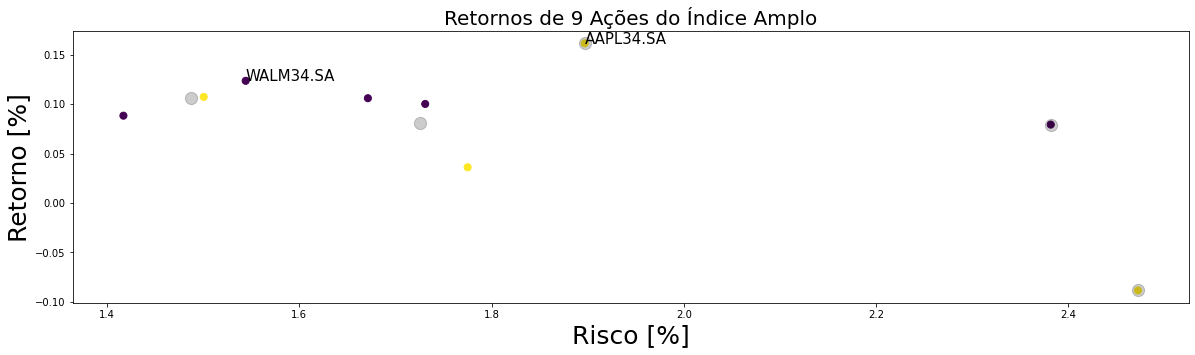

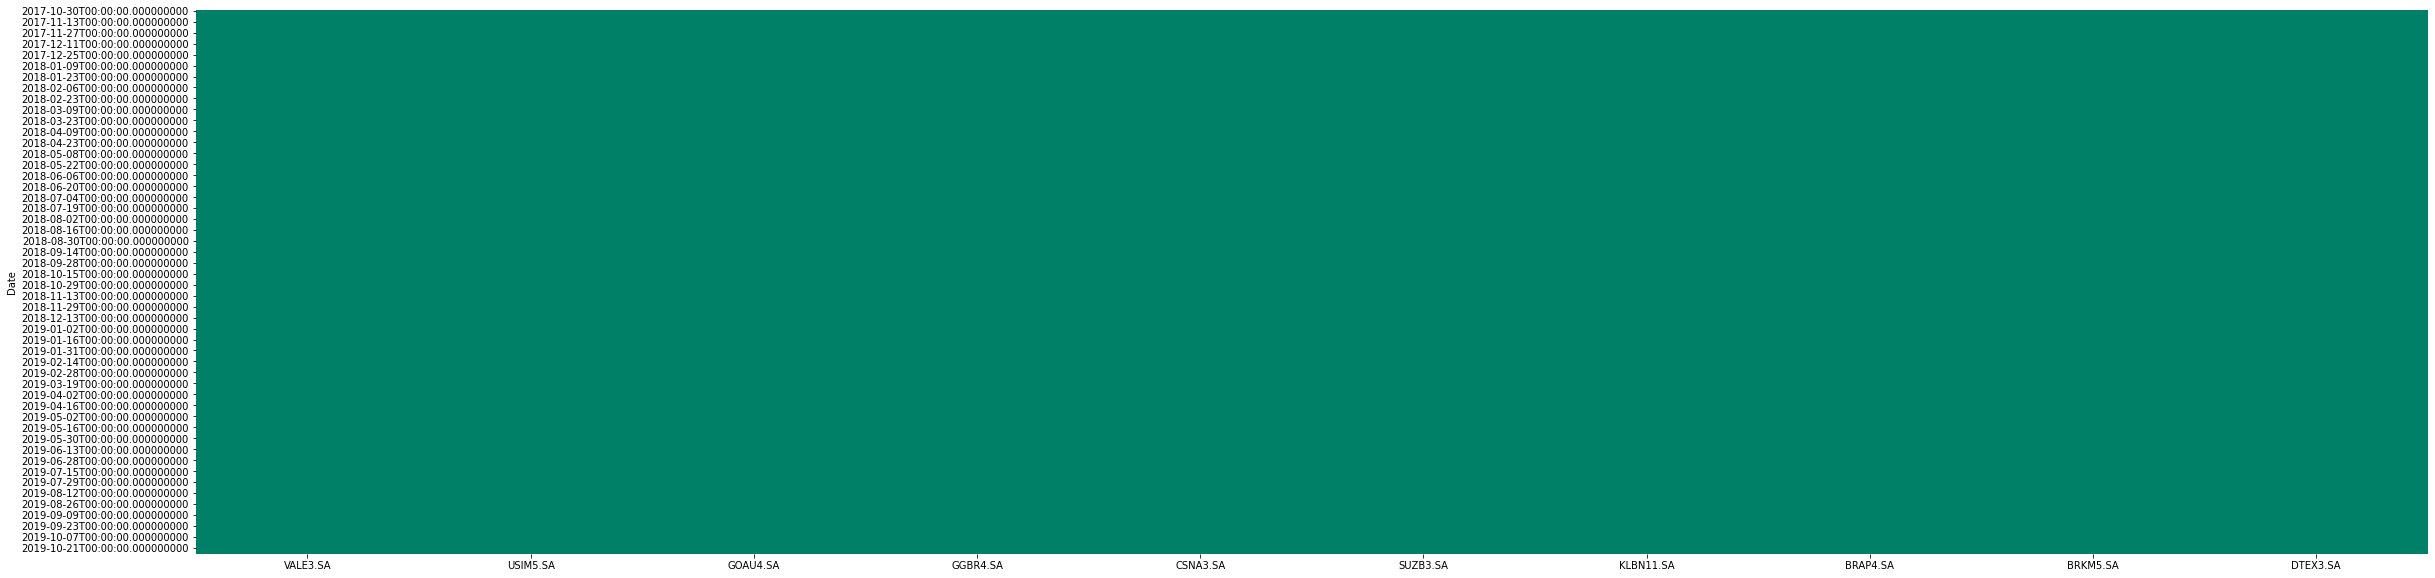

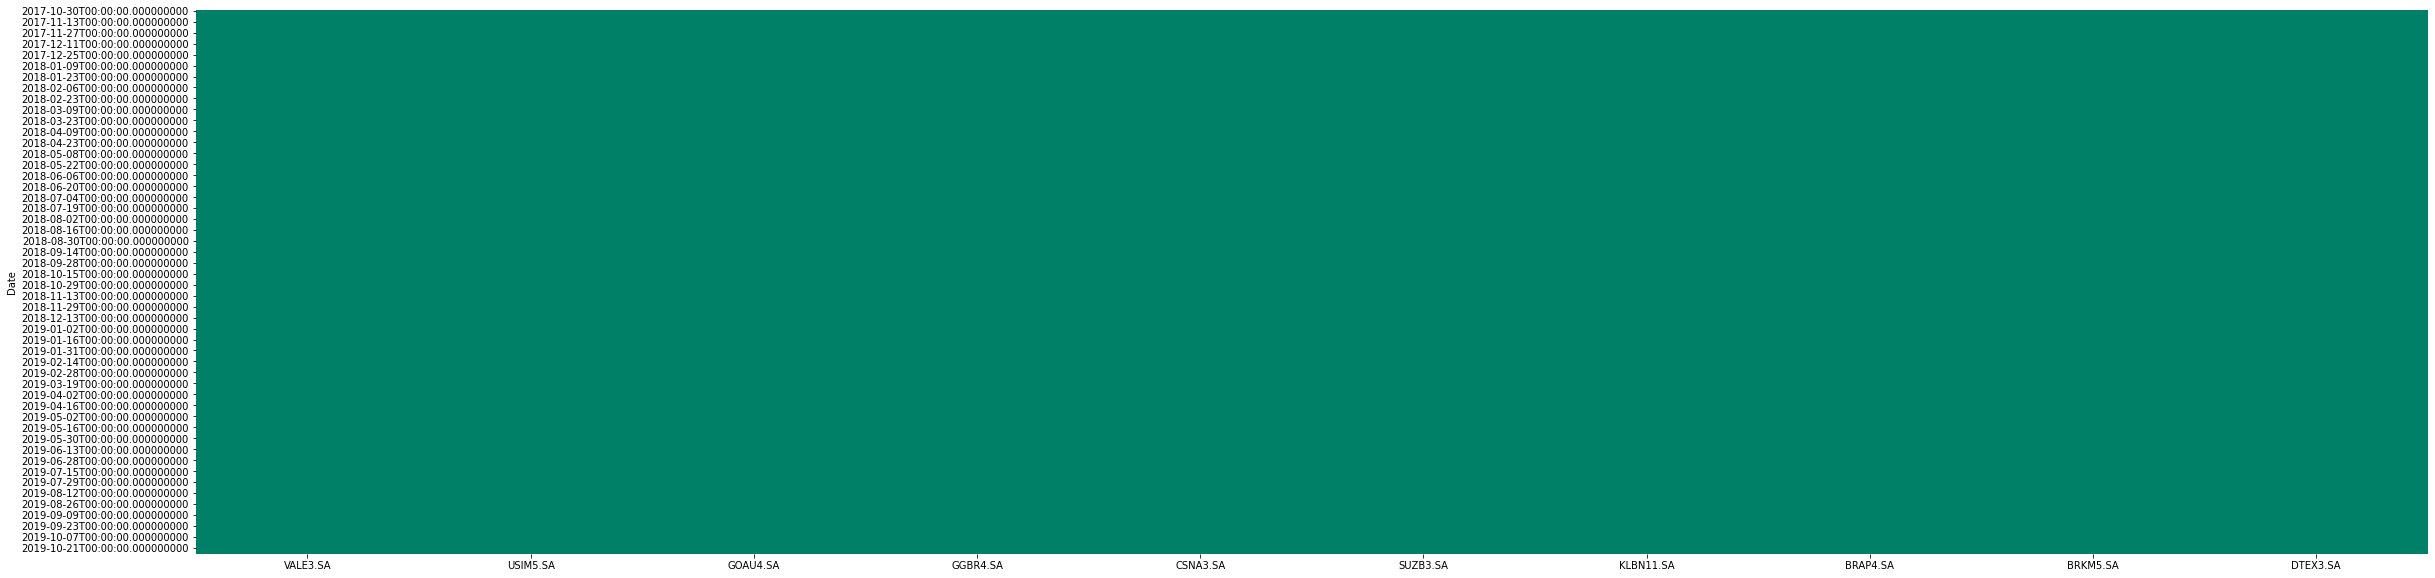

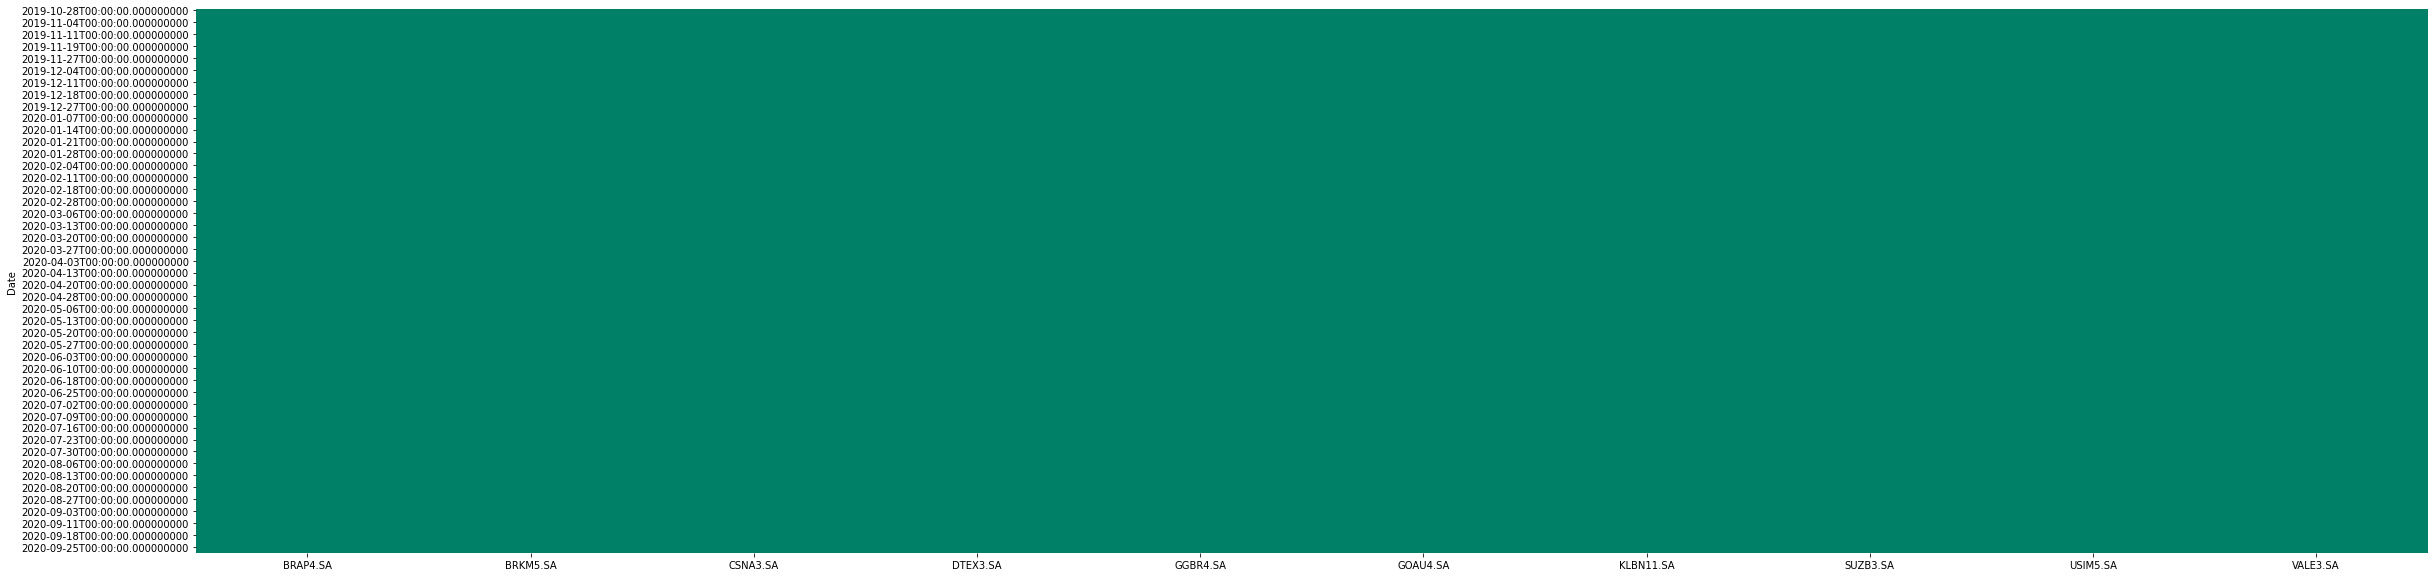

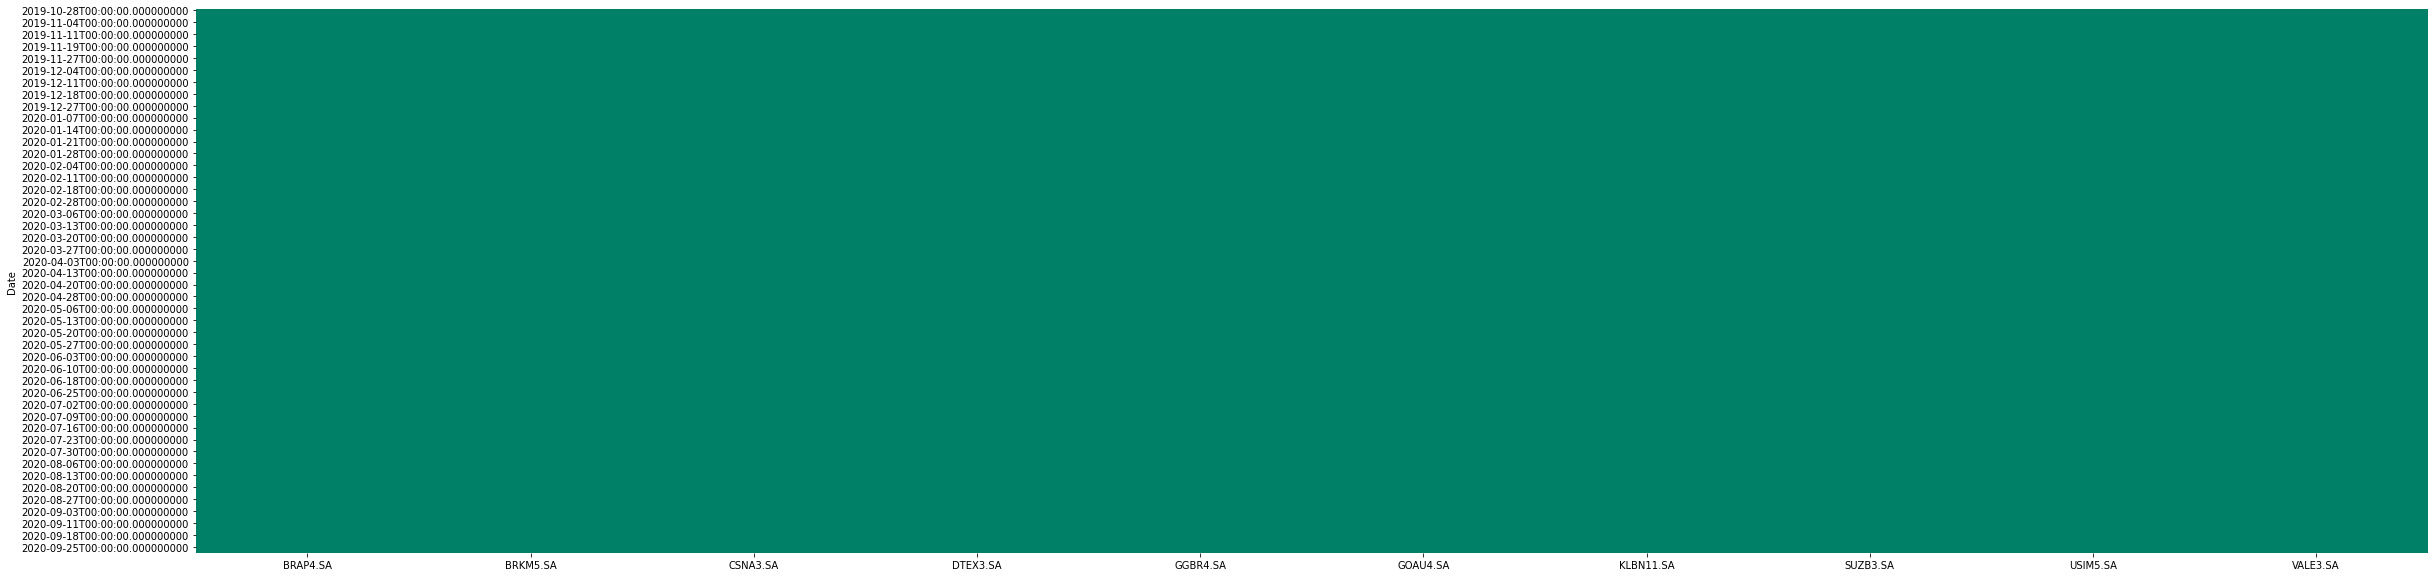

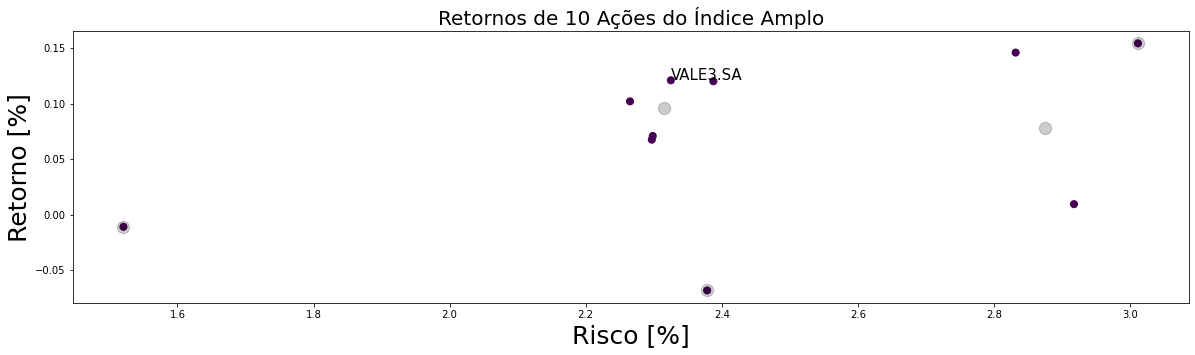

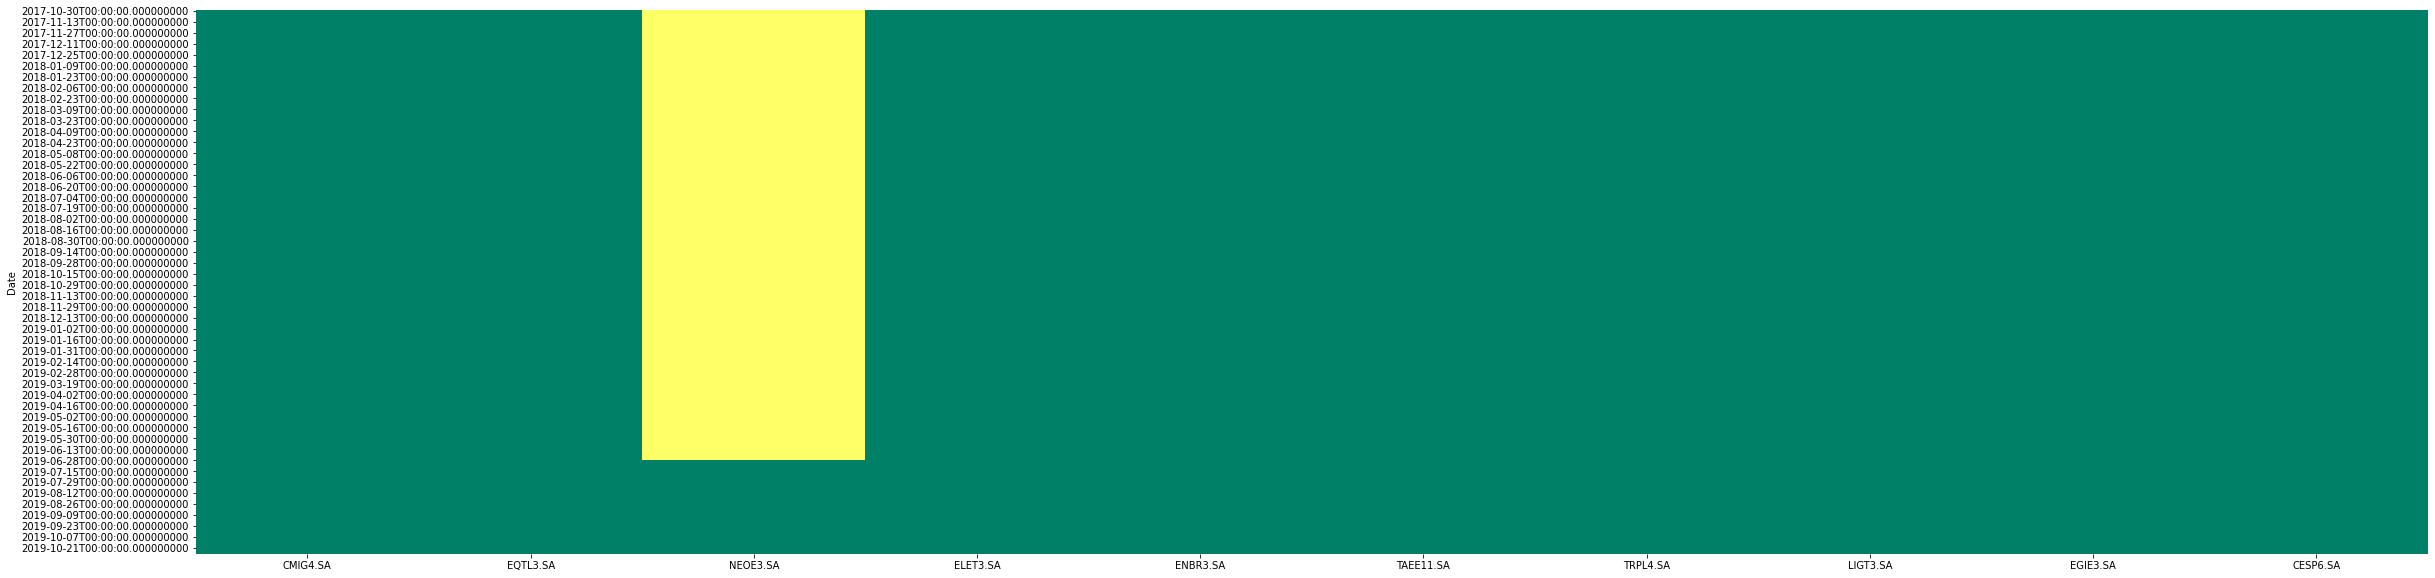

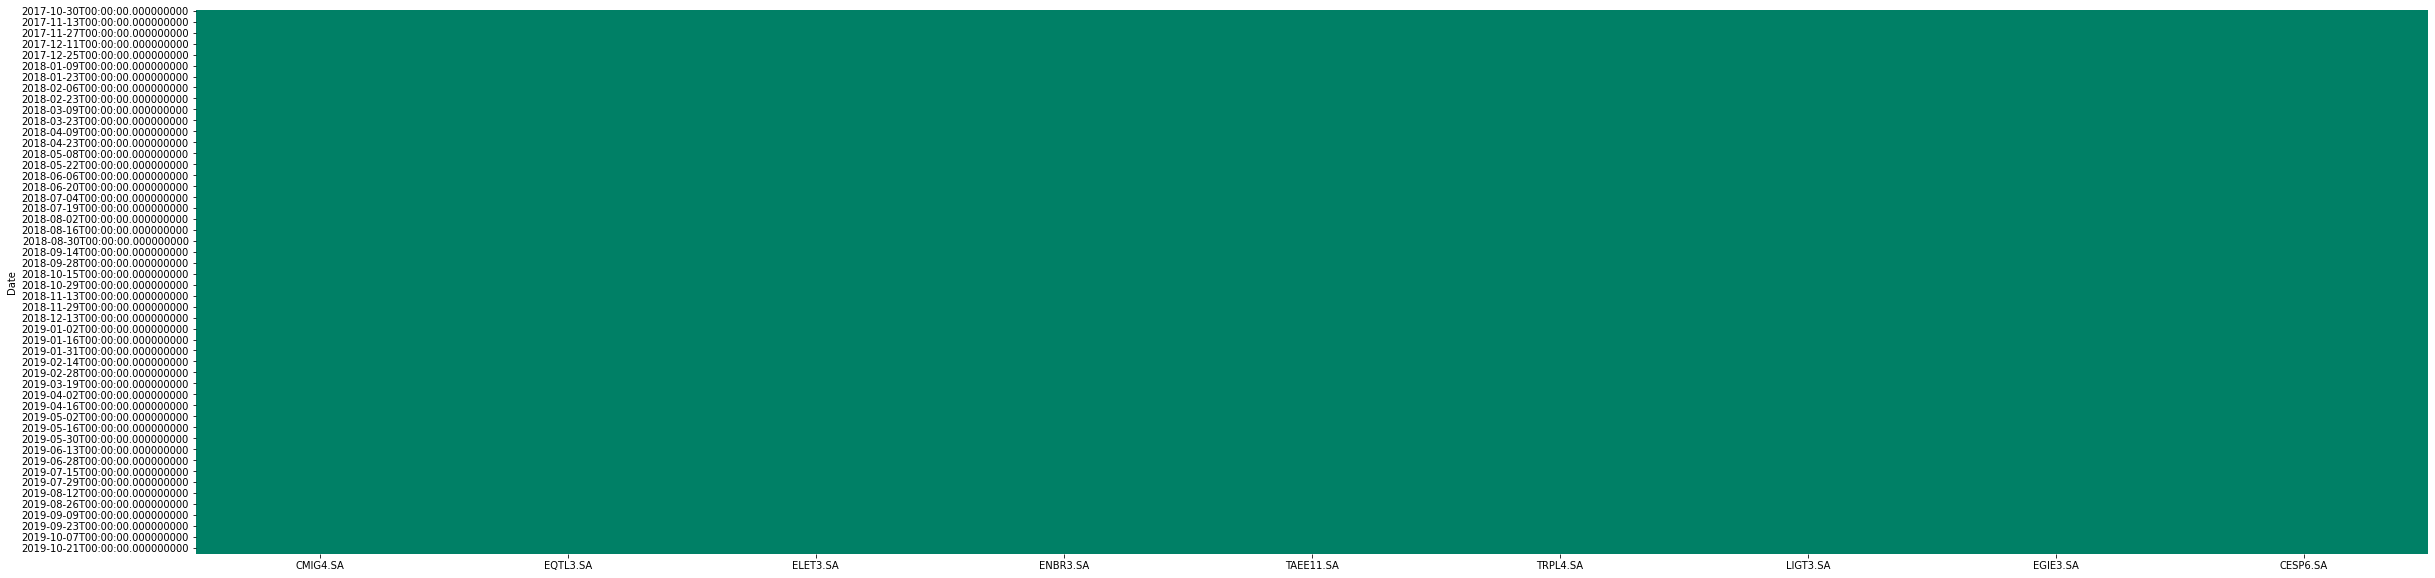

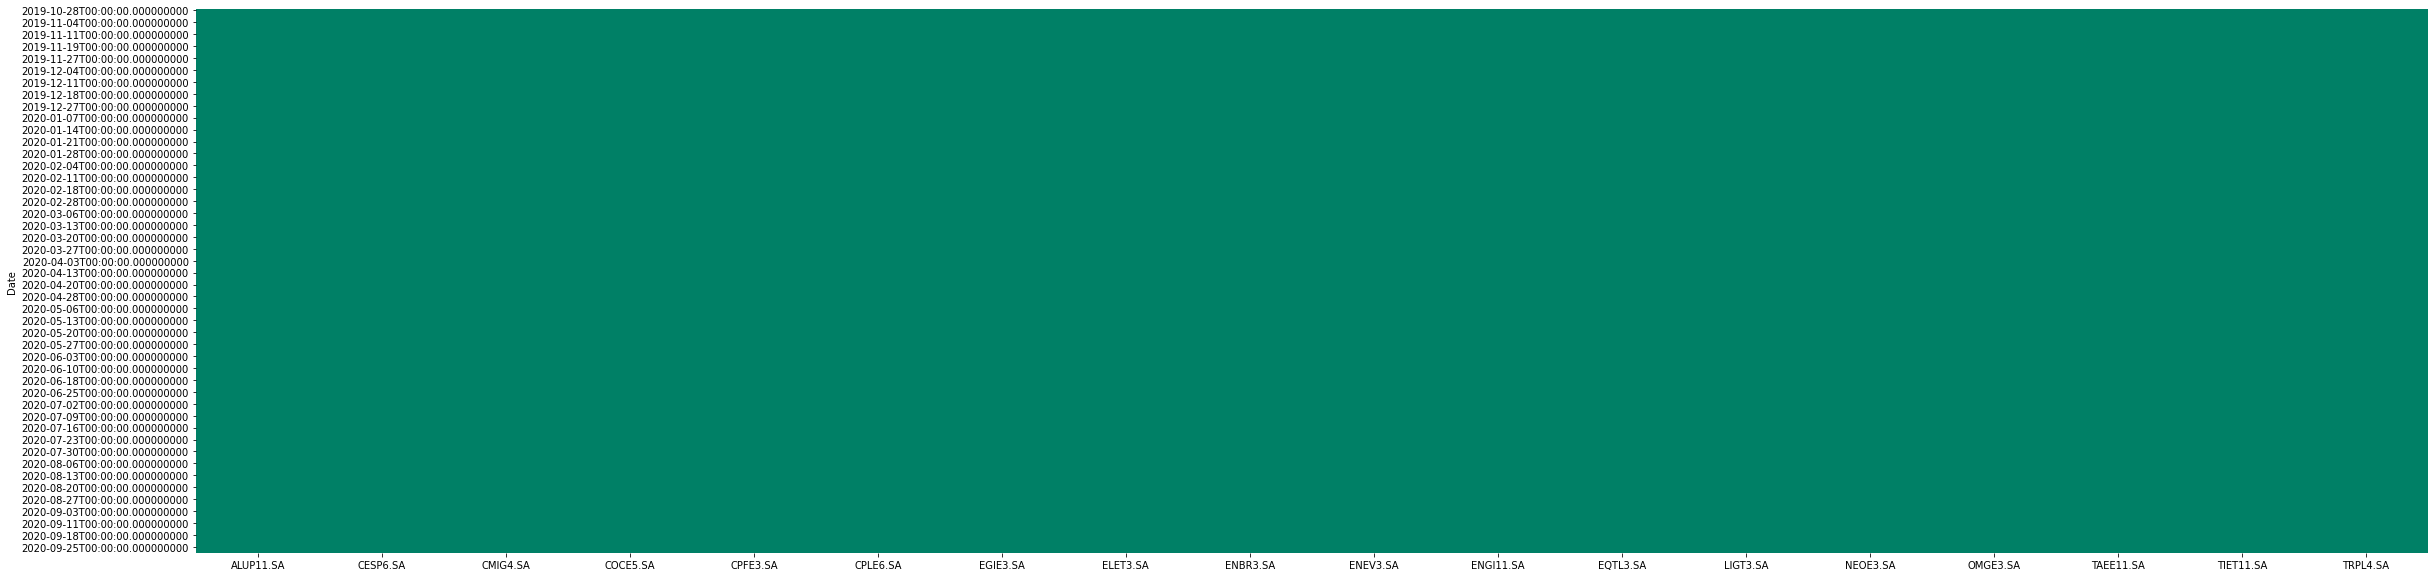

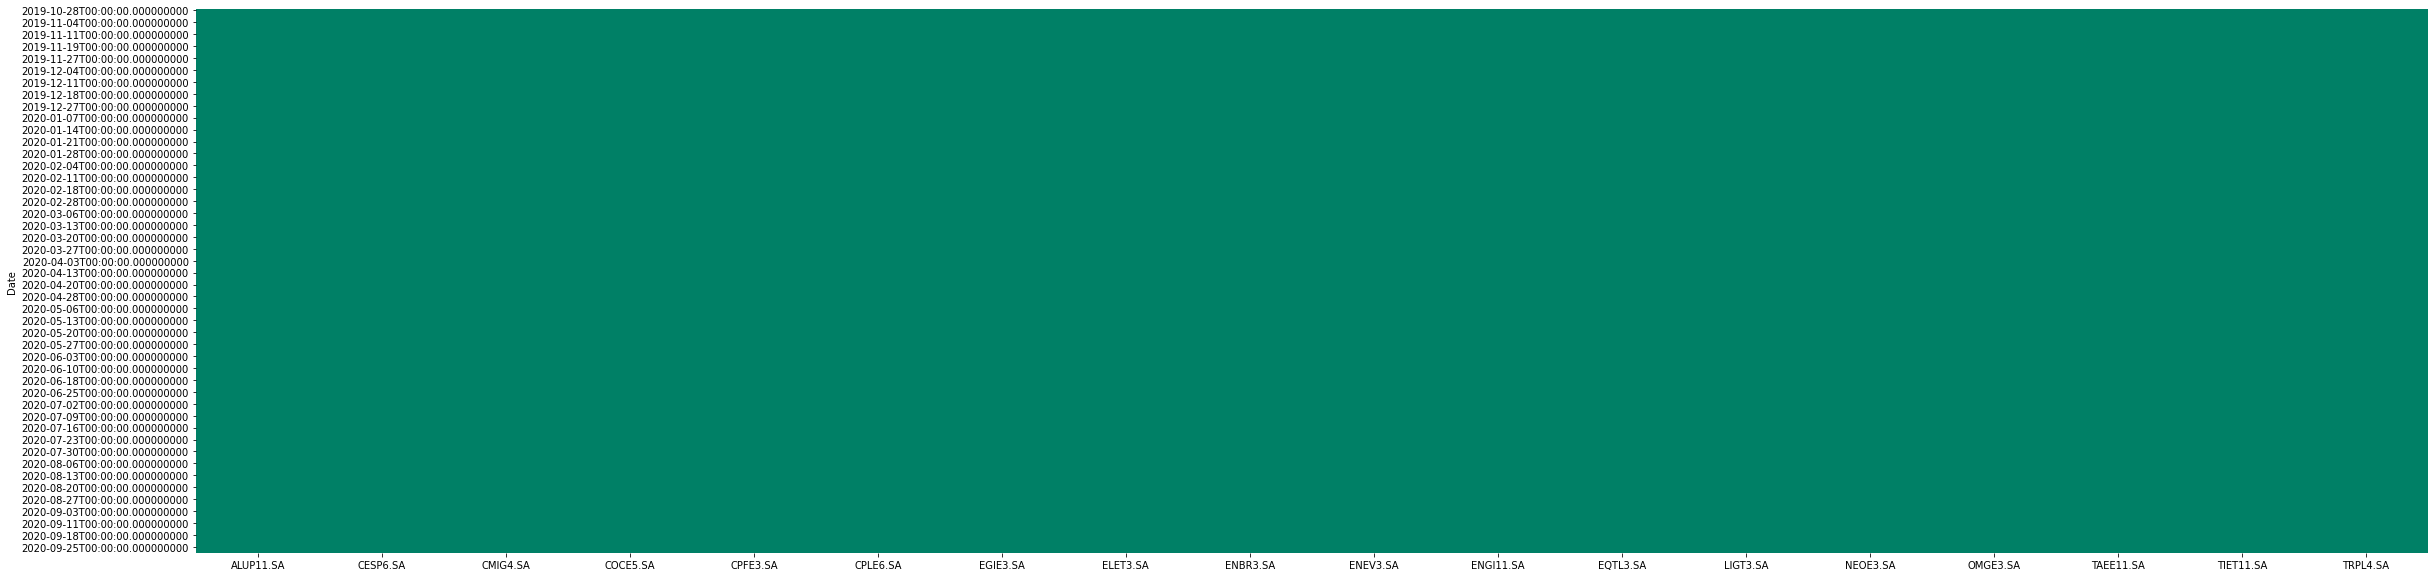

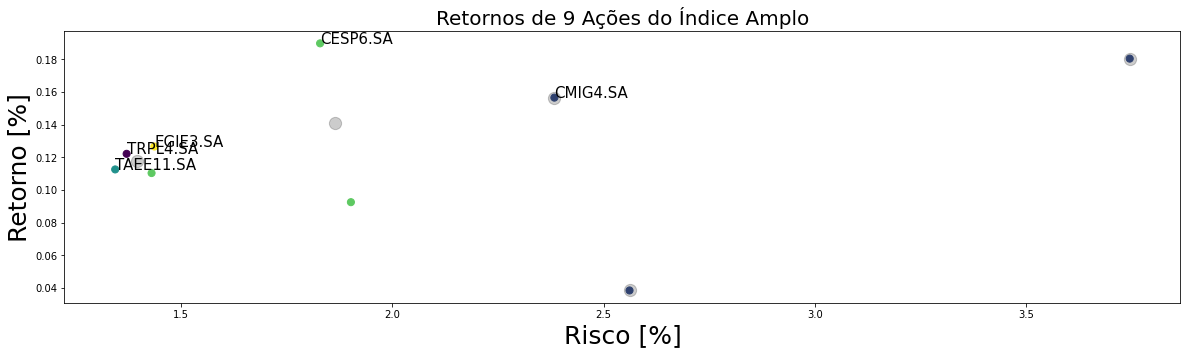

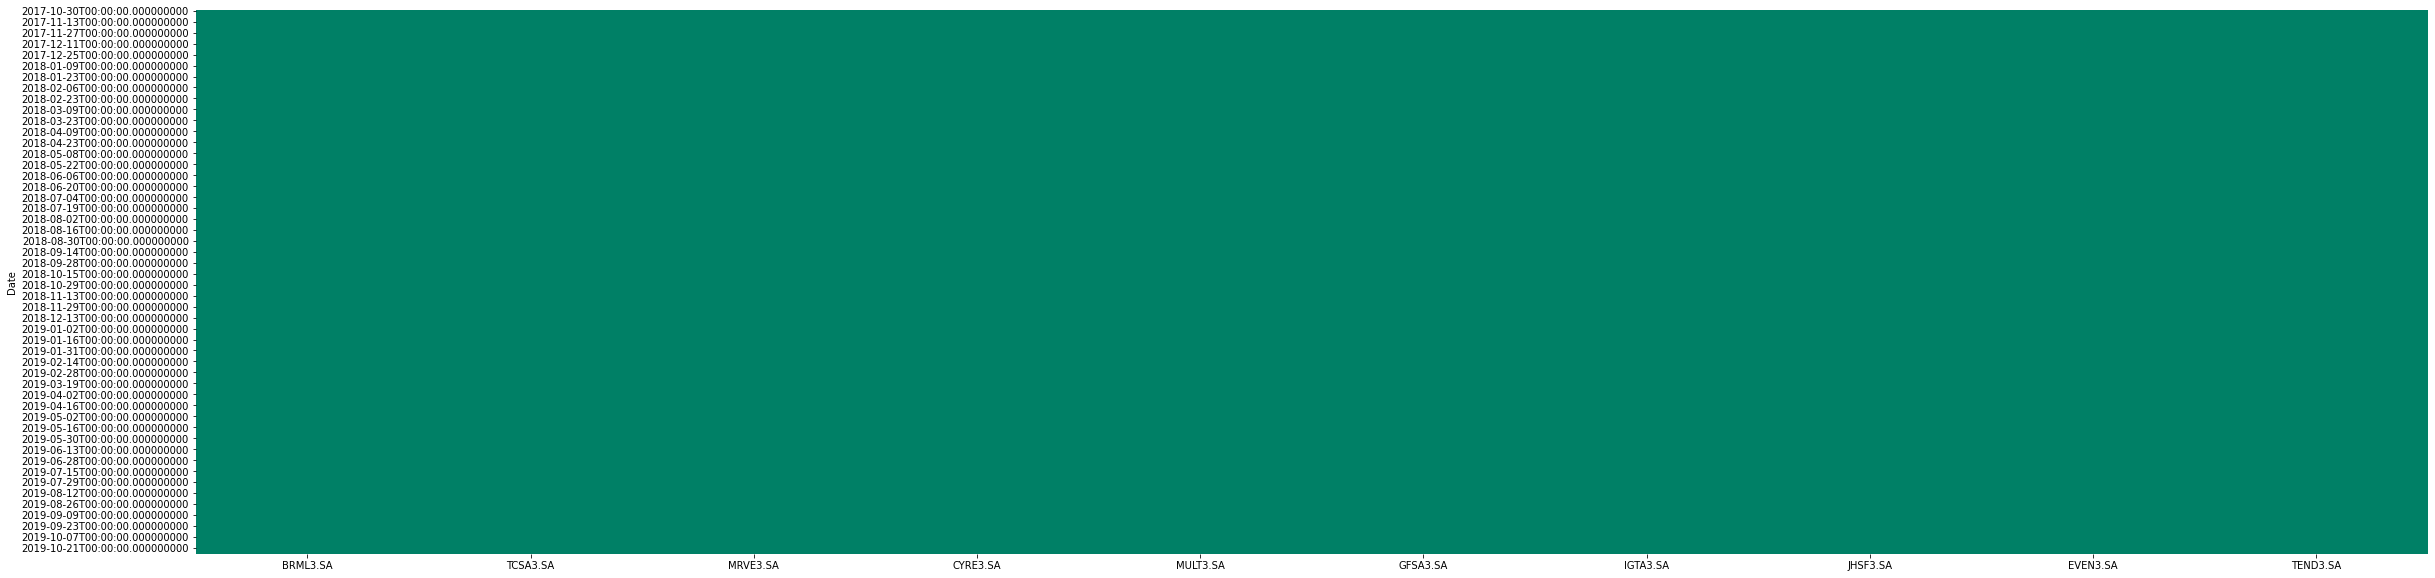

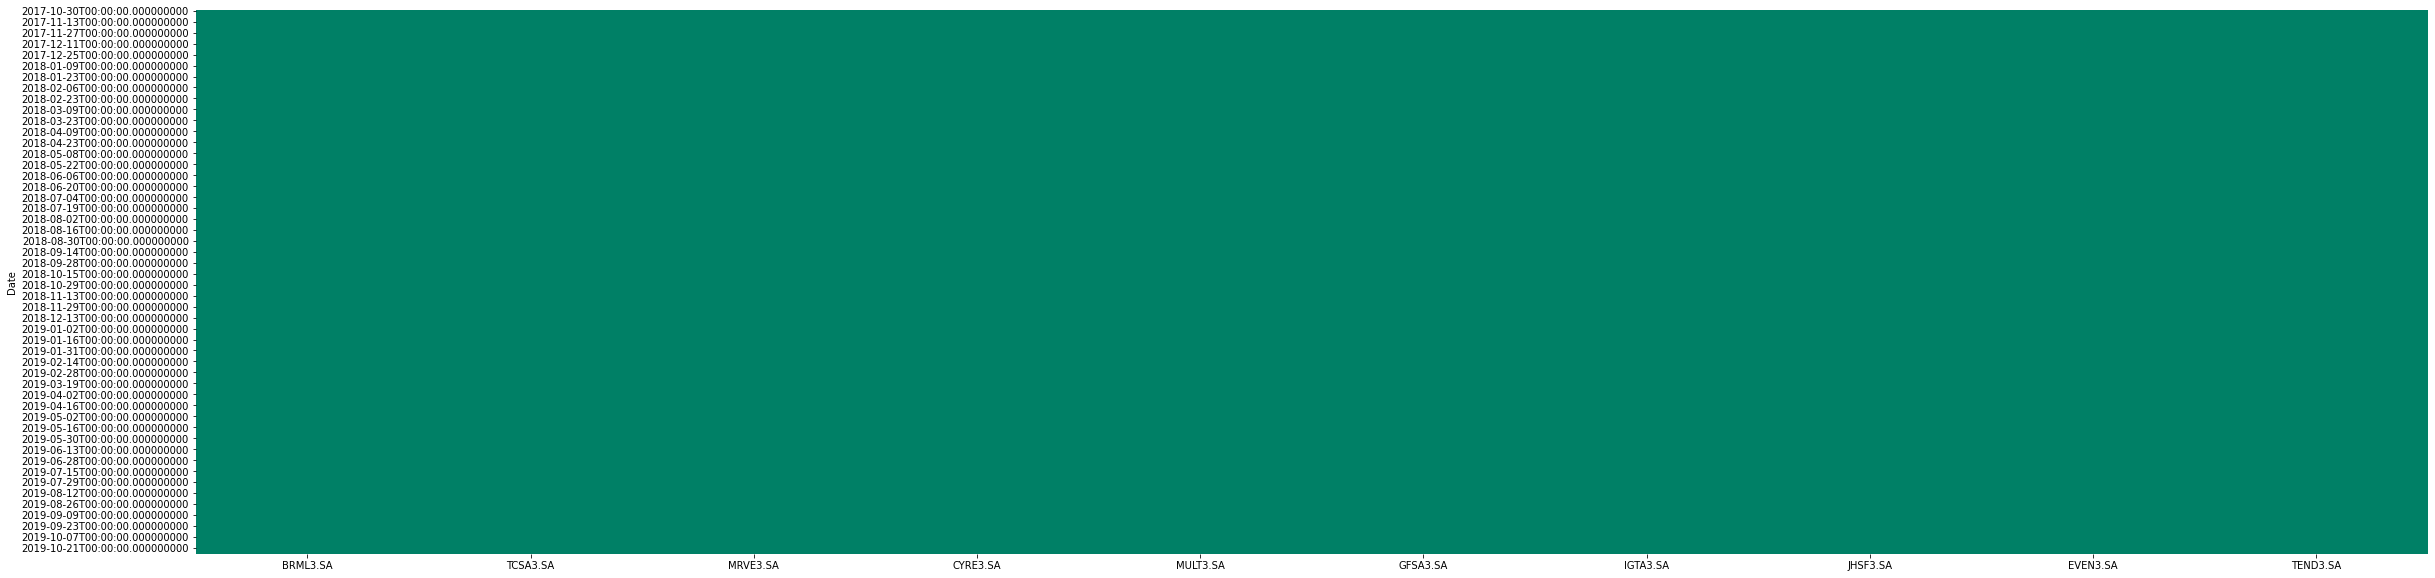

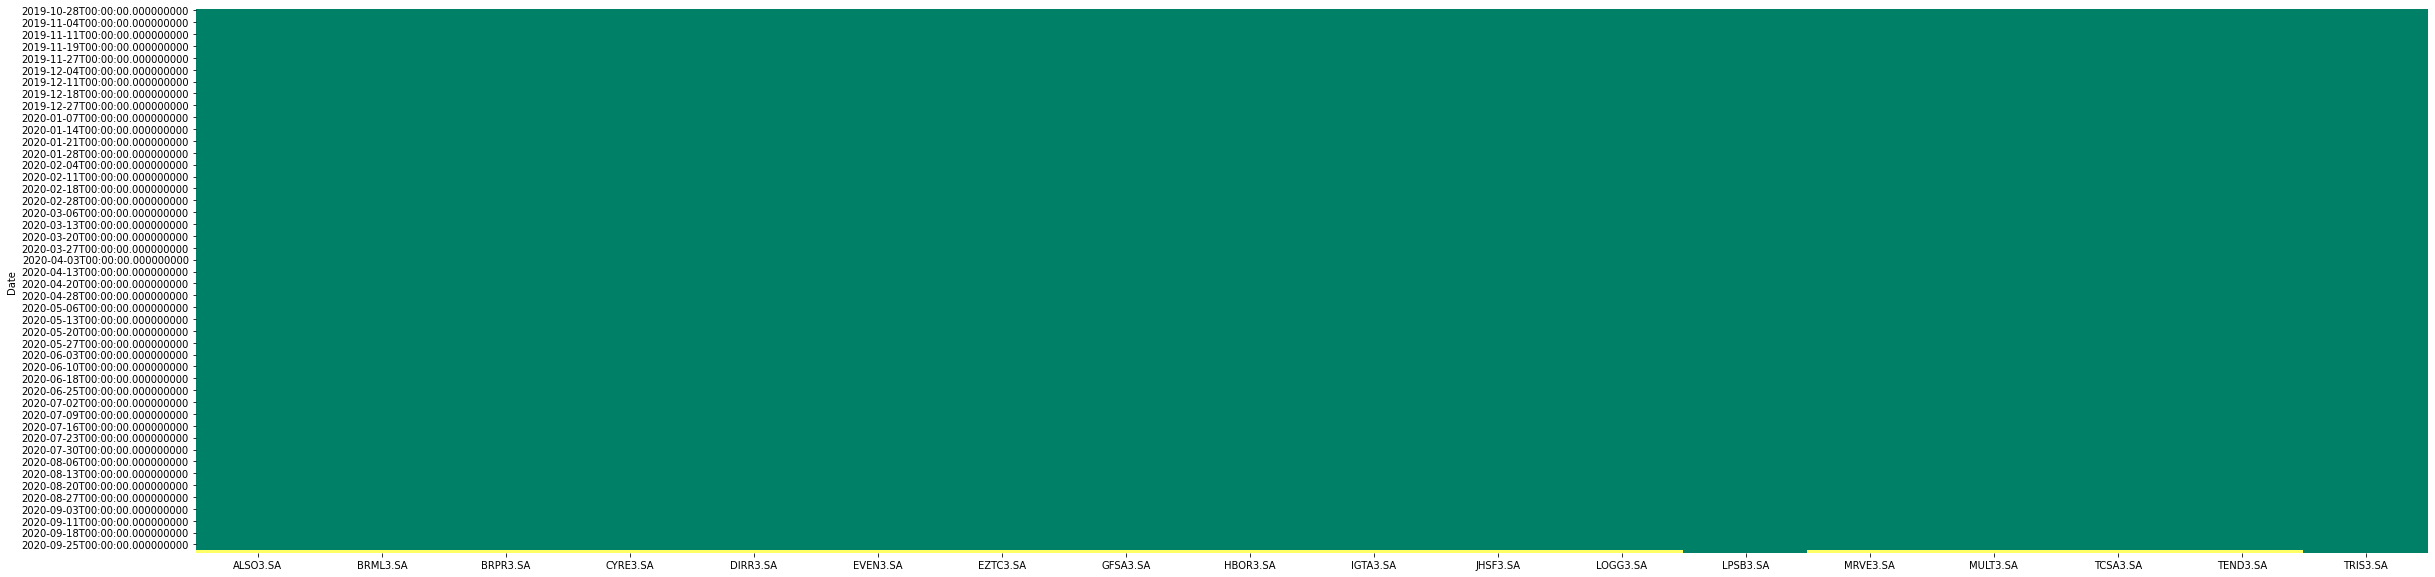

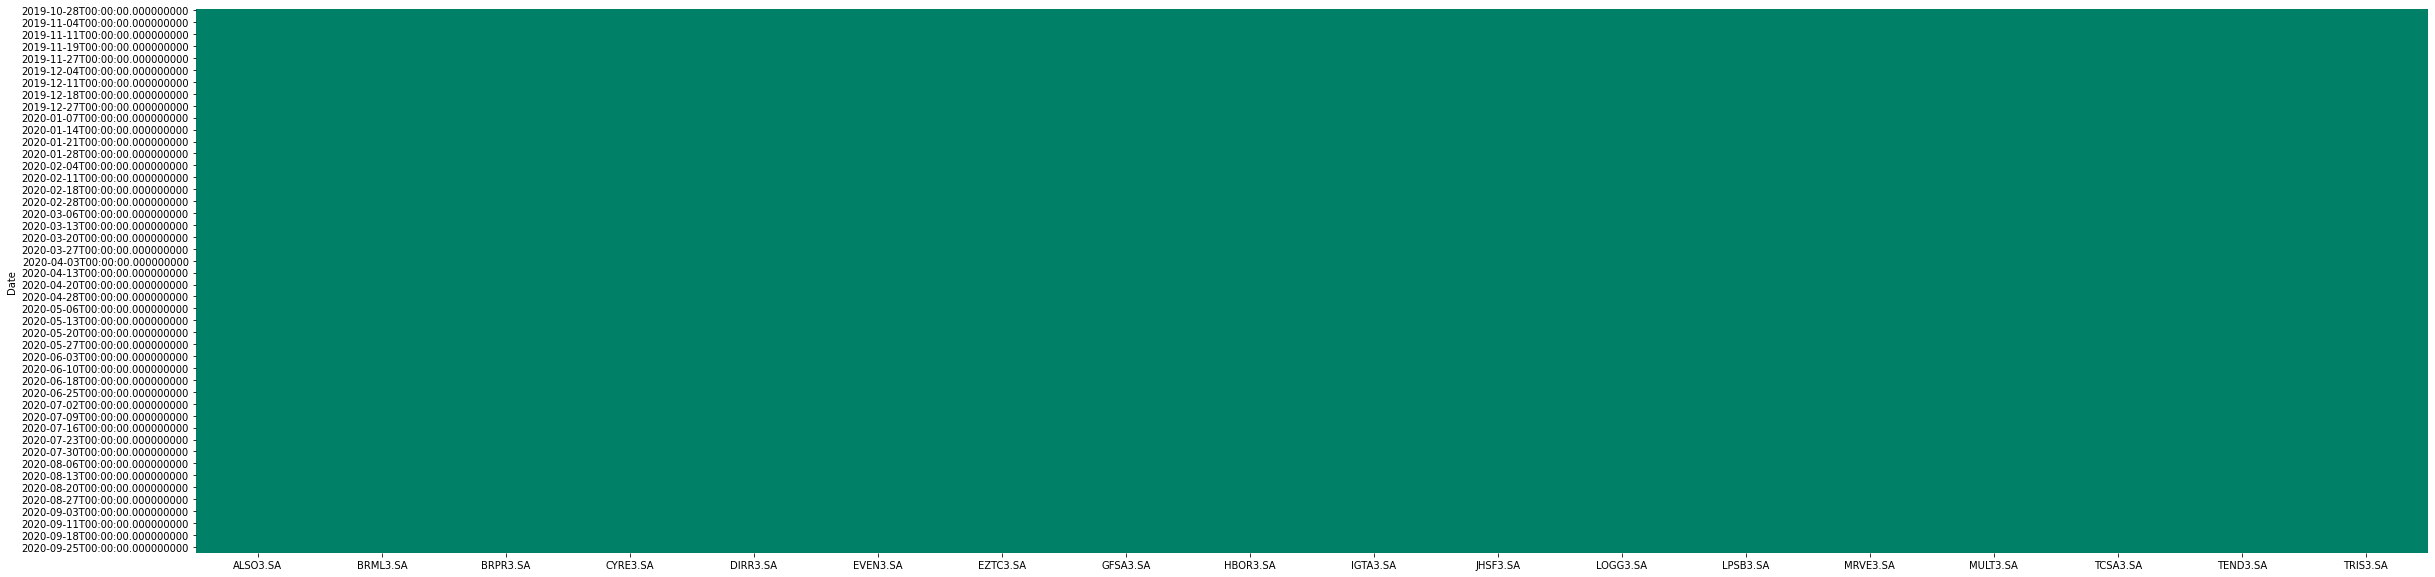

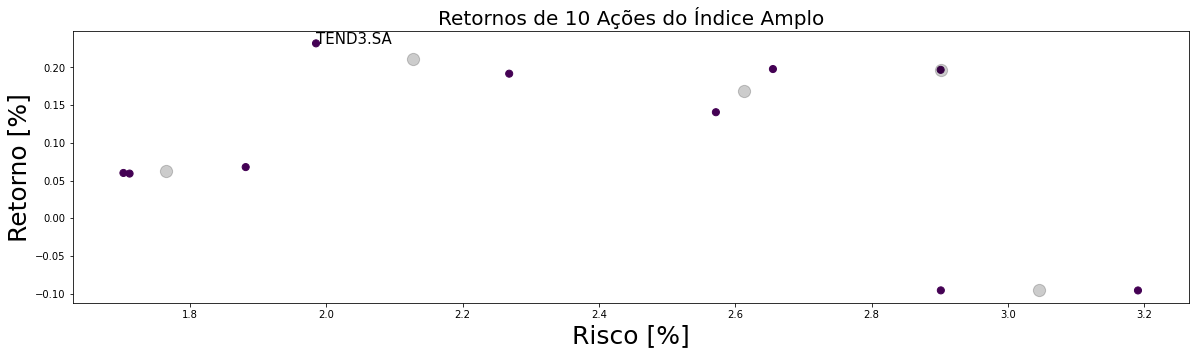

In [7]:
from tqdm import tqdm
bestes = []
for index in tqdm(indexes):
    best = fi.get_best_actives(train[index], test[index], 5, index)
    bestes.append(best)
bestes

In [8]:
bestes

[('IFNC', ('IRBR3.SA', -0.12227272102757683)),
 ('BDRX', ('AAPL34.SA', -0.17827402652505206)),
 ('IMAT', ('VALE3.SA', -0.16281650622281627)),
 ('IEE', ('CMIG4.SA', -0.14392333491984158)),
 ('IMOB', ('TEND3.SA', -0.13489344080321852))]

In [49]:
data = {}
for a in bestes:
    data[a[1][0]] = []

In [50]:
data

{'IRBR3.SA': [],
 'AAPL34.SA': [],
 'VALE3.SA': [],
 'CMIG4.SA': [],
 'TEND3.SA': []}

In [51]:
for i in range(496):
    data[bestes[0][1][0]].append(train[bestes[0][0]][bestes[0][1][0]].iloc[i])
    data[bestes[1][1][0]].append(train[bestes[1][0]][bestes[1][1][0]].iloc[i])
    data[bestes[2][1][0]].append(train[bestes[2][0]][bestes[2][1][0]].iloc[i])
    data[bestes[3][1][0]].append(train[bestes[3][0]][bestes[3][1][0]].iloc[i])
    data[bestes[4][1][0]].append(train[bestes[4][0]][bestes[4][1][0]].iloc[i])

for i in range(228):
    data[bestes[0][1][0]].append(test[bestes[0][0]][bestes[0][1][0]].iloc[i])
    data[bestes[1][1][0]].append(test[bestes[1][0]][bestes[1][1][0]].iloc[i])
    data[bestes[2][1][0]].append(test[bestes[2][0]][bestes[2][1][0]].iloc[i])
    data[bestes[3][1][0]].append(test[bestes[3][0]][bestes[3][1][0]].iloc[i])
    data[bestes[4][1][0]].append(test[bestes[4][0]][bestes[4][1][0]].iloc[i])


In [52]:
new_df = pd.DataFrame(data=data)

In [53]:
new_df.head()

,IRBR3.SA,AAPL34.SA,VALE3.SA,CMIG4.SA,TEND3.SA
0,10.184237,11.877673,28.765331,6.411795,8.266505
1,10.125629,11.920903,28.543030,6.354258,8.100701
2,10.264506,11.834442,29.183250,6.091208,8.427570
3,10.264506,11.834442,29.183250,6.091208,8.427570
4,10.332370,12.292687,29.823473,5.754180,8.242818


<AxesSubplot:>

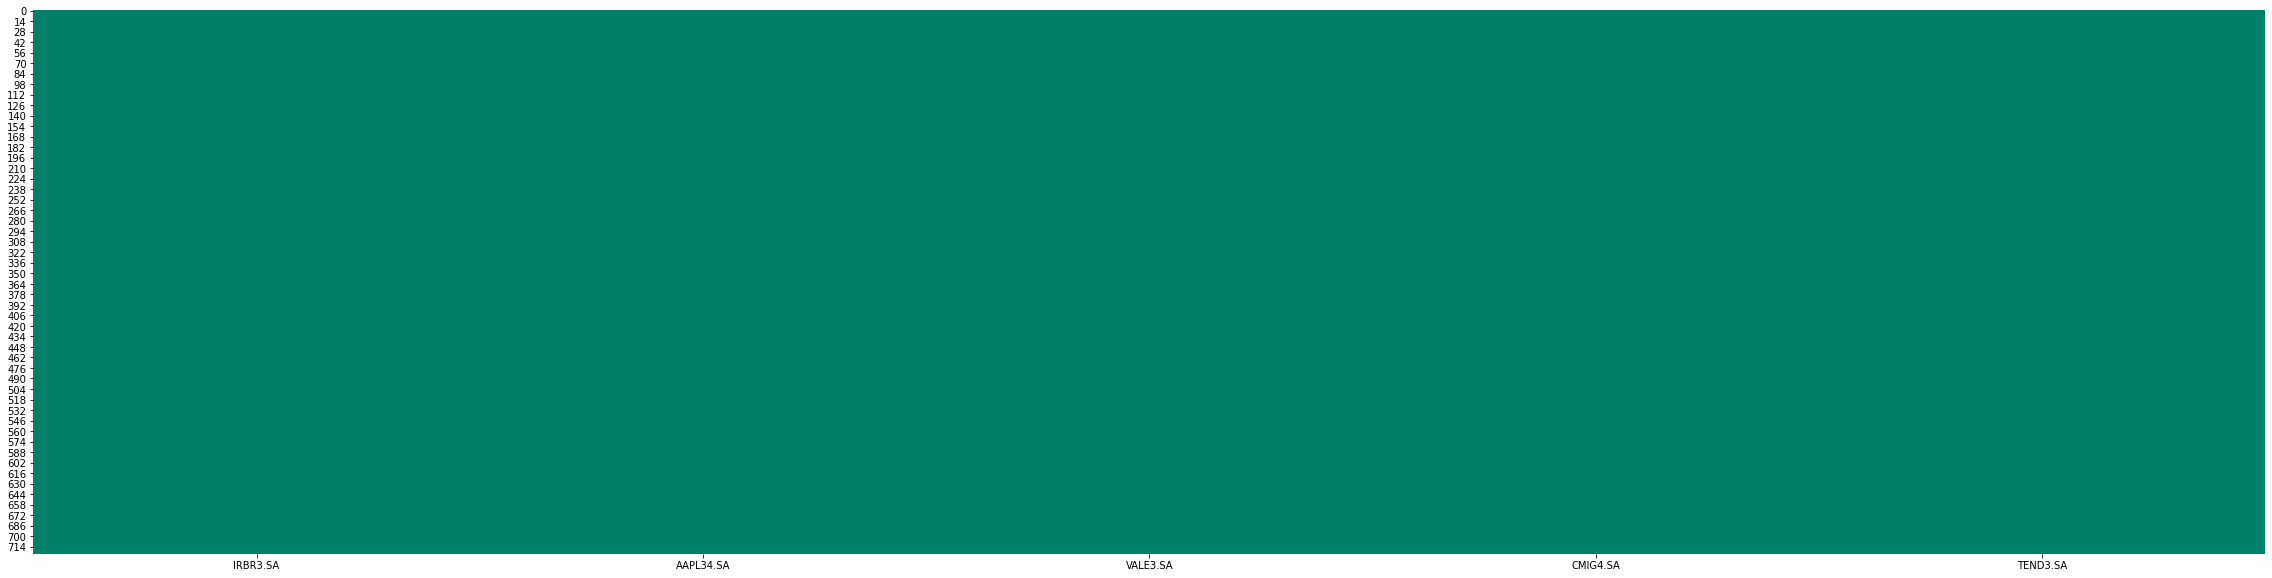

In [54]:
fi.plot_data_segmentation(new_df)

In [55]:
ret=new_df.diff().dropna().copy()
ret=100*ret/new_df.iloc[0]

In [56]:
ret

,IRBR3.SA,AAPL34.SA,VALE3.SA,CMIG4.SA,TEND3.SA
1,-0.575469,0.363961,-0.772810,-0.897370,-2.005732
2,1.363646,-0.727929,2.225668,-4.102582,3.954138
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.666358,3.858039,2.225674,-5.256383,-2.234952
5,1.575455,0.491375,2.472927,0.000000,-3.381097
...,...,...,...,...,...
719,5.400505,-9.850399,4.484555,-3.405449,-4.332804
720,7.658893,-0.420951,-1.529614,5.727330,7.221340
721,0.883720,19.448233,2.051081,-3.715016,-0.481446
722,0.589145,20.711152,-1.633916,-4.069978,-10.952325


In [57]:
import numpy as np
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)

In [58]:
[print("ACTIVE: {} PESO: {}\n".format(active, round(qm[i][0],2))) for i, active in enumerate(ret.columns)]
pass

ACTIVE: IRBR3.SA PESO: 0.79

ACTIVE: AAPL34.SA PESO: -2.06

ACTIVE: VALE3.SA PESO: 1.37

ACTIVE: CMIG4.SA PESO: 1.95

ACTIVE: TEND3.SA PESO: -1.05



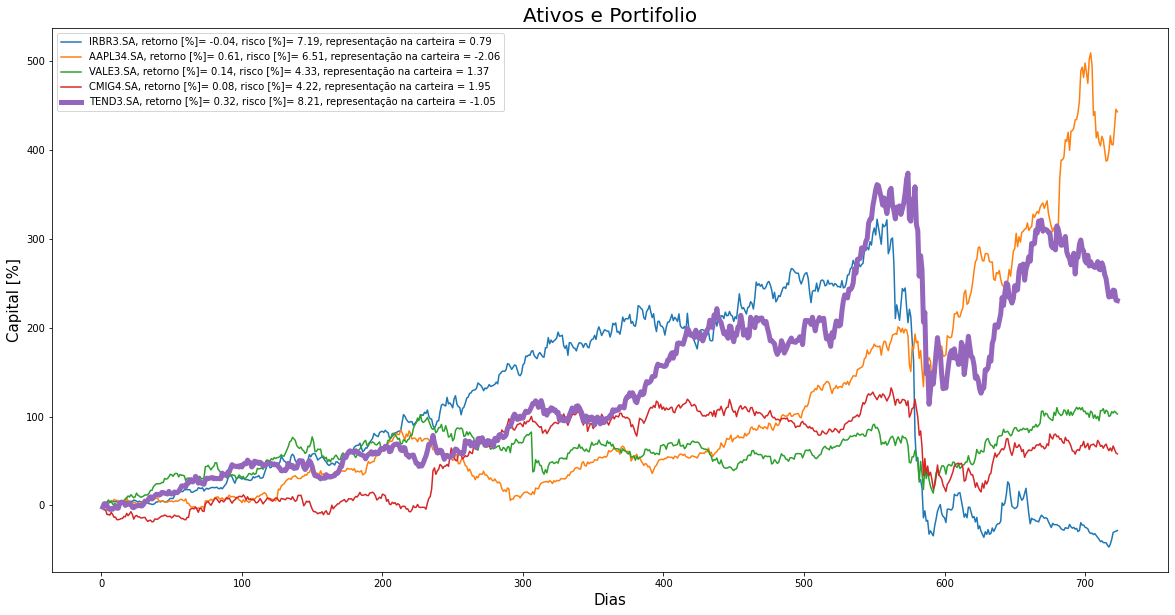

In [62]:
pesos=[qm[i][0] for i in range(len(qm))]+[1]
plt.figure(figsize=(20, 10))

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        plt.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret.columns))):
        plt.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
plt.legend(loc='upper left')
plt.xlabel("Dias",fontsize=15)
plt.ylabel('Capital [%]',fontsize=15)
plt.title("Ativos e Portifolio",fontsize=20)
pass

In [63]:
ai = AIFinancial(new_df, new_df)

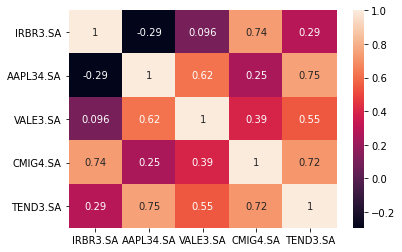

In [64]:
ai.heatmap_train()